# Logical Perceptron

In [35]:
import pandas as pd

# TODO: Set weight1, weight2, and bias
#AND PERCEPTRON의 가중치와 바이어스
'''weight1 = 1.0
weight2 = 1.0
bias = -1.5''' 
#OR PERCEPTRON의 가중치와 바이어스
'''weight1 = 1.0
weight2 = 1.0
bias = -0.5'''  
#OR PERCEPTRON의 가중치와 바이어스
'''weight1 = 2 
weight2 = 2
bias = -1.5''' 
#NOT PERCEPTRON의 가중치와 절편
weight1 = 0
weight2 = -0.1 
bias = 0

#XOR PERCEPTRON은 Multi-Layer Perceptron으로 build한다.


# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [False, False, False, True] # AND Perceptron coreect_outputs
correct_outputs2 = [False, True, True, True] # OR Perceptron coreect_outputs
correct_outputs3 = [True, False, True, False] # NOT Perceptron corecct_outputs인데 test_input의 두번째 입력만 고려한다.
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs3):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong)) 
print(output_frame.to_string(index=False)) 

Nice!  You got it all correct.

Input 1    Input 2    Linear Combination    Activation Output   Is Correct
      0          0                   0.0                    1          Yes
      0          1                  -0.1                    0          Yes
      1          0                   0.0                    1          Yes
      1          1                  -0.1                    0          Yes


# XOR Percepton

In [5]:

#XOR PERCEPTRON은 Multi-Layer Perceptron으로 build한다.
weight1 = 1.0
weight2 = 1.0 
weight3 = -1.0
weight4 =1.0
weight5 =1.0 
bias = -1.5
bias2 = -0.5

# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [False, True, True, False] # XOR Perceptron coreect_outputs
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias #AND (A)
    output = int(linear_combination >= 0) #AND output
    linear_combination2 = weight3 * output #NOT (A->C)
    output2 = int(linear_combination2>= 0) #NOT output
    linear_combination3 = weight4 * test_input[0] + weight5 * test_input[1] + bias2#OR
    output3 = int(linear_combination3 >= 0) #OR output (B)
    linear_combination4 = weight1 * output2 + weight2 * output3 + bias #AND ( C & B )
    output4 = int(linear_combination4 >= 0)
    is_correct_string = 'Yes' if output4 == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination4, output4, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong)) 
print(output_frame.to_string(index=False)) 


Nice!  You got it all correct.

Input 1    Input 2    Linear Combination    Activation Output   Is Correct
      0          0                  -0.5                    0          Yes
      0          1                   0.5                    1          Yes
      1          0                   0.5                    1          Yes
      1          1                  -0.5                    0          Yes


# Perceptron Example

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(5)

def stepFunction(t): #활성함수
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b): #퍼셉트론 동작
    return stepFunction((np.matmul(X,W)+b)[0])

# TODO: Fill in the code below to implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01): #학습 알고리즘
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b

    
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):#epoch : 데이터셋을 몇번 반복할것인가
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines
    

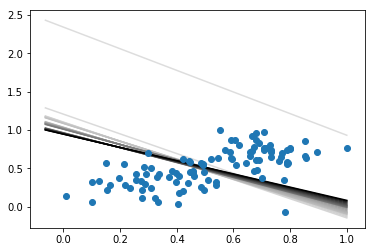

In [33]:
data = np.loadtxt('data2.csv', delimiter = ',')
X = data[:,:-1] 
y = data[:,-1] 

boundary_lines=trainPerceptronAlgorithm(X,y)

plt.figure() 
X_min = X.min() 
X_max = X.max() 

counter = len(boundary_lines) 
    
for W, b in boundary_lines:
    counter -= 1
    color = [1 - 0.92 ** counter for _ in range(3)] #그래프에 그려질 색깔 선정
    plt.plot([X_min, X_max],[X_min * W + b, X_max * W + b], color = color)
    
plt.scatter(X[:,0], X[:,1],zorder=3) 
plt.show()

# Gradient_Descent

Train - Predictors shape (80, 1)
Test - Predictors shape (20, 1)
Train - Target shape (80, 1)
Test - Target shape (20, 1)


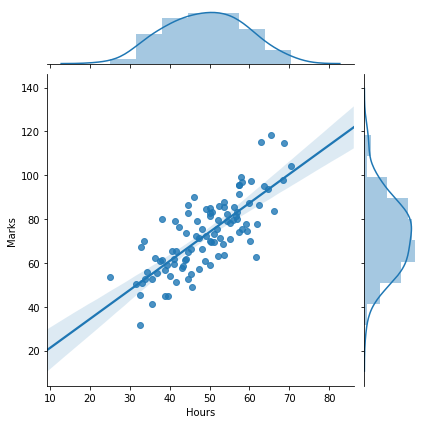

In [62]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
import time
from sklearn.linear_model import SGDRegressor
from sklearn.utils import shuffle

df = pd.read_csv('data3.csv', index_col=False)
df.head()

sns.jointplot(x=df['Hours'], y=df['Marks'], data=df, kind='reg')

#setting Data
x_train, x_test, y_train, y_test = train_test_split(df['Hours'], df['Marks'], test_size=0.2, random_state=42)

x_train = x_train.values.reshape(-1,1)
x_test = x_test.values.reshape(-1,1)
y_train =y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

print('Train - Predictors shape', x_train.shape)
print('Test - Predictors shape', x_test.shape)
print('Train - Target shape', y_train.shape)
print('Test - Target shape', y_test.shape)

# Batch Gradient Descent

In [63]:
def weightInitialization(n_features):
    w = np.zeros((1,n_features))
    b = 0
    return w,b

def model_optimize(w,b,X,Y):
    #
    m = X.shape[0]
    #
    final_result = np.dot(w, X.T) + b
    cost = (1/m)*np.sum((Y.T - final_result) ** 2)
    #
    dw = (-2/m)*np.sum((np.dot(X.T,(Y.T - final_result).T)))
    db = (-2/m)*np.sum(((Y.T - final_result)))
    #
    grads = {"dw": dw, "db": db}
    
    return grads, cost

def gradientUpdate(w,b,X, Y, learning_rate, no_iterations):
    costs = []
    for i in range(no_iterations):
        #
        grads, cost = model_optimize(w,b, X,Y)
        #
        dw = grads["dw"]
        db = grads["db"]
        #Weight Update
        w = w - (learning_rate*dw)
        b = b - (learning_rate*db)
        #
        
        costs.append(cost)
    #
    
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}
    
    return coeff, gradient, costs

def predict(x,w,b):
    final_pred = np.dot(w, x.T) + b
    return final_pred


In [64]:

start_time = time.time()
#
#Get number of features
n_features = x_train.shape[1]
m_tr = x_train.shape[0]
m_ts = x_test.shape[0]
print('Number of Features', n_features)
w, b = weightInitialization(n_features)
#Gradient Descent
coeff, gradient, costs = gradientUpdate(w, b, x_train, y_train, learning_rate=0.0001,no_iterations=20)
#Final prediction
w = coeff["w"]
b = coeff["b"]
print('Optimized weights', w)
print('Optimized intercept',b)
#
final_tr_pred = predict(x_train, w,b)
final_tr_cost = (1/m_tr)*np.sum((y_train.T - final_tr_pred) ** 2)
print('Training error',final_tr_cost)
#
final_ts_pred = predict(x_test, w,b)
final_ts_cost = (1/m_ts)*np.sum((y_test.T - final_ts_pred) ** 2)
print('Test error',final_ts_cost)
#
print('Model R^2 Square value', metrics.r2_score(y_test, final_ts_pred.T))
#
print("--- %s seconds ---" % (time.time() - start_time))


Number of Features 1
Optimized weights [[1.48658234]]
Optimized intercept 0.03090541362538872
Training error 110.04357167049562
Test error 123.81197636929906
Model R^2 Square value 0.6892738465111586
--- 0.003009319305419922 seconds ---


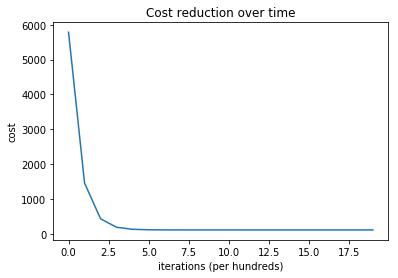

In [65]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Cost reduction over time')
plt.show()

Text(0, 0.5, 'Residual')

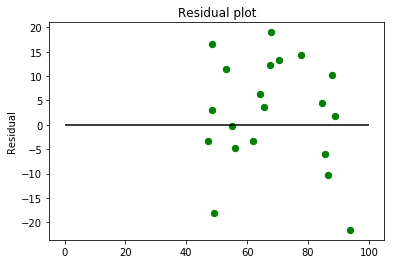

In [66]:
plt.scatter(final_ts_pred, final_ts_pred.T - y_test, c='g', s = 40)
plt.hlines(y=0, xmin=0, xmax=100)
plt.title('Residual plot')
plt.ylabel('Residual')

# Stochastic Gradient Descent

In [68]:
def stochasticUpdate(w,b,X, Y, learning_rate, no_iterations):
    #
    n_points = X.shape[0]
    #
    for i in range(no_iterations):
        for i in range(n_points):
            index = np.random.randint(n_points)
            x_pt = X[index:index+1]
            y_pt = Y[index:index+1]
            grads, cost = model_optimize(w,b, x_pt,y_pt)
            #
            dw = grads["dw"]
            db = grads["db"]
            #Weight Update
            w = w - (learning_rate*dw)
            b = b - (learning_rate*db)
        #
            costs.append(cost)
    #
    
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}
    
    return coeff, gradient, costs

In [70]:
start_time = time.time()
#Get number of features
n_features = x_train.shape[1]
m_tr = x_train.shape[0]
m_ts = x_test.shape[0]
print('Number of Features', n_features)
w, b = weightInitialization(n_features)


#Gradient Descent
coeff, gradient, costs = stochasticUpdate(w, b, x_train, y_train, learning_rate=0.00001,no_iterations=10)
#Final prediction
w = coeff["w"]
b = coeff["b"]
print('Optimized weights', w)
print('Optimized intercept',b)
#


final_tr_pred = predict(x_train, w,b)
final_tr_cost = (1/m_tr)*np.sum((y_train.T - final_tr_pred) ** 2)
print('Training error',final_tr_cost)
#
final_ts_pred = predict(x_test, w,b)
final_ts_cost = (1/m_ts)*np.sum((y_test.T - final_ts_pred) ** 2)
print('Test error',final_ts_cost)
#
print('Model R^2 Square value', metrics.r2_score(y_test, final_ts_pred.T))

print("--- %s seconds ---" % (time.time() - start_time))

Number of Features 1
Optimized weights [[1.45618933]]
Optimized intercept 0.03725424800104784
Training error 112.38683136799055
Test error 120.02493219302008
Model R^2 Square value 0.6987780455756949
--- 0.0511014461517334 seconds ---


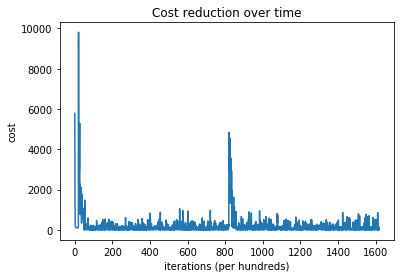

In [72]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Cost reduction over time')
plt.show()

In [73]:
sgd_reg = SGDRegressor(n_iter=10, penalty=None, eta0=0.0001)
sgd_reg.fit(x_train, y_train)
sgd_reg.intercept_, sgd_reg.coef_

C:\Users\IBK\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\IBK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([0.03411322]), array([1.44497408]))

Text(0, 0.5, 'Residual')

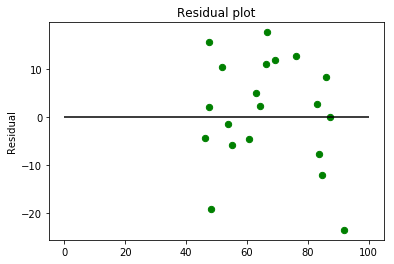

In [75]:
plt.scatter(final_ts_pred, final_ts_pred.T - y_test, c='g', s = 40)
plt.hlines(y=0, xmin=0, xmax=100)
plt.title('Residual plot')
plt.ylabel('Residual')

# Mini-Batch Gradient Descent

In [83]:
def miniBatchUpdate(w,b,X, Y, learning_rate, no_iterations):
    #
    n_points = X.shape[0]
    #
    for i in range(no_iterations):
        X, y = shuffle(x_train, y_train)
        x_random = X[:40]
        y_random = y[:40]
        
        grads, cost = model_optimize(w,b, x_random,y_random)
        #
        dw = grads["dw"]
        db = grads["db"]
        #Weight Update
        w = w - (learning_rate*dw)
        b = b - (learning_rate*db)
        #
        costs.append(cost)
    #
    
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}
    
    return coeff, gradient, costs

In [84]:
start_time = time.time()
#Get number of features
n_features = x_train.shape[1]
m_tr = x_train.shape[0]
m_ts = x_test.shape[0]
print('Number of Features', n_features)
w, b = weightInitialization(n_features)


#Gradient Descent
coeff, gradient, costs = miniBatchUpdate(w, b, x_train, y_train, learning_rate=0.0001,no_iterations=10)
#Final prediction
w = coeff["w"]
b = coeff["b"]
print('Optimized weights', w)
print('Optimized intercept',b)
#


final_tr_pred = predict(x_train, w,b)
final_tr_cost = (1/m_tr)*np.sum((y_train.T - final_tr_pred) ** 2)
print('Training error',final_tr_cost)
#
final_ts_pred = predict(x_test, w,b)
final_ts_cost = (1/m_ts)*np.sum((y_test.T - final_ts_pred) ** 2)
print('Test error',final_ts_cost)
#
print('Model R^2 Square value', metrics.r2_score(y_test, final_ts_pred.T))

print("--- %s seconds ---" % (time.time() - start_time))

Number of Features 1
Optimized weights [[1.46381745]]
Optimized intercept 0.029898197995871473
Training error 111.37585365895967
Test error 120.5814694797508
Model R^2 Square value 0.6973813253596866
--- 0.004464149475097656 seconds ---


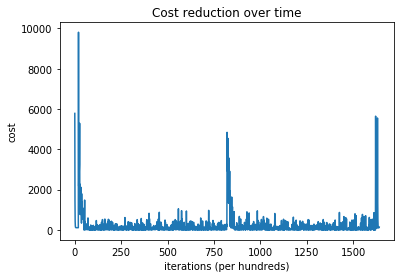

In [85]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Cost reduction over time')
plt.show()

Text(0, 0.5, 'Residual')

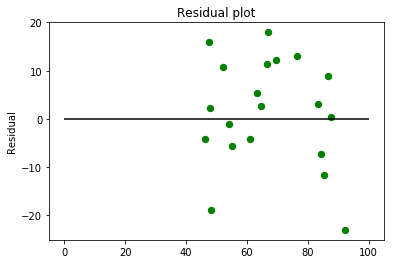

In [86]:
plt.scatter(final_ts_pred, final_ts_pred.T - y_test, c='g', s = 40)
plt.hlines(y=0, xmin=0, xmax=100)
plt.title('Residual plot')
plt.ylabel('Residual')